EN2550 - Fundementals of Image Processing and Machine Vision

Name : R.G.S.M. RANATUNGA

Index No. : 190504H

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

Hough Transform

Part1

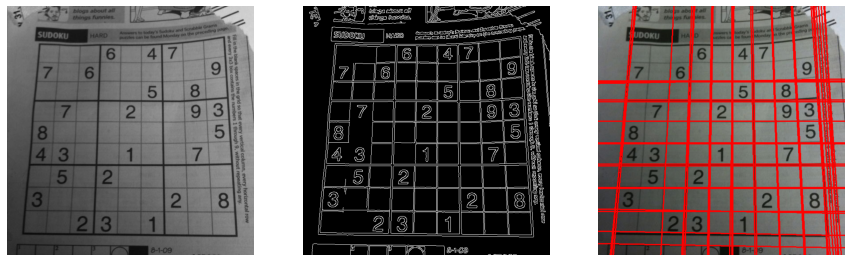

In [4]:
img = cv.imread('sudoku.png',cv.IMREAD_COLOR)
assert img is not None

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
edged = cv.Canny(gray,50,150,apertureSize = 3)
lines = cv.HoughLines(edged,1,np.pi/180,175)

for line in lines:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0,y0 = a*rho,b*rho
    x1,y1 = int(x0+1000*(-b)),int(y0+1000*(a))
    x2,y2 = int(x0-1000*(-b)),int(y0-1000*(a))
    cv.line(img,(x1,y1),(x2,y2),(0,0,255),2)

gray = cv.cvtColor(gray, cv.COLOR_BGR2RGB)
edged = cv.cvtColor(edged, cv.COLOR_BGR2RGB)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

fig,ax = plt.subplots(1,3,figsize = (15,5))
ax[0].imshow(gray) ; ax[0].axis('off');
ax[1].imshow(edged) ; ax[1].axis('off');
ax[2].imshow(img) ; ax[2].axis('off');

Part 2

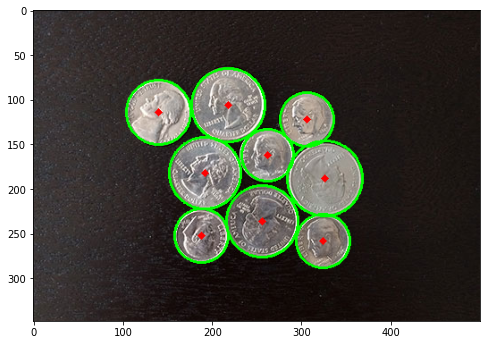

In [5]:
img = cv.imread('coins.jpg', cv.IMREAD_COLOR)  
assert img is not None

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray = cv.medianBlur(gray,5)
circles = cv.HoughCircles(gray,cv.HOUGH_GRADIENT,1,50, param1=150,param2=20,minRadius=20,maxRadius=50)
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv.circle(img,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv.circle(img,(i[0],i[1]),2,(0,0,255),3)

fig,ax = plt.subplots(figsize = (8, 8))
ax.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))


Part 3

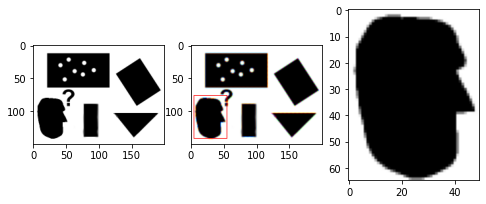

In [6]:
im = cv.imread('pic1.png', cv.IMREAD_REDUCED_GRAYSCALE_2)
templ = cv.imread('templ.png', cv.IMREAD_REDUCED_GRAYSCALE_2)

im_edges = cv.Canny(im, 50, 250)
templ_edges = cv.Canny(templ, 50, 250)

alg = cv.createGeneralizedHoughGuil()
alg.setTemplate(templ_edges)
alg.setAngleThresh(100000)
alg.setScaleThresh(40000)
alg.setPosThresh(1000)
alg.setAngleStep(1)
alg.setScaleStep(0.1)
alg.setMinScale(0.9)
alg.setMaxScale(1.1)
positions, votes = alg.detect(im_edges)

out = cv.cvtColor(im, cv.COLOR_BAYER_BG2BGR)

for x,y,scale, orientation in positions[0]:
    halfHeight = templ.shape[0] / 2. * scale
    halfWidth = templ.shape[1] / 2. * scale
    p1 = (int(x - halfWidth), int(y - halfHeight))
    p2 = (int(x + halfWidth), int(y + halfHeight))
    print("")
    cv.rectangle(out, p1, p2, (0,0,255))

fig,ax = plt.subplots(1,3, figsize = (8, 12))
ax[0].imshow(cv.cvtColor(im, cv.COLOR_BGR2RGB))
ax[1].imshow(cv.cvtColor(out, cv.COLOR_BGR2RGB))
ax[2].imshow(cv.cvtColor(templ, cv.COLOR_BGR2RGB))

Alignment

Part 4

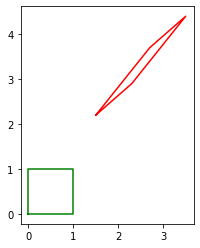

In [7]:
a, b, c, d = [0, 0, 1], [0, 1, 1], [1,1,1], [1,0,1]
X = np.array([a,b,c,d]).T

theta = np.pi*30/180
s = 1
tx, ty = 1.5, 2.2
# H = np.array([[s*np.cos(theta), -s*np.sin(theta), tx], [s*np.sin(theta), s*np.cos(theta), ty], [0,0,1]])
# Y = H @ X

a11, a12, a21, a22 = 0.8, 1.2, 0.7, 1.5 #Should be a non-singular matrix here
A = np.array([[a11,a12,tx], [a21, a22, ty], [0,0,1]])
Y = A @ X

x = np.append(X[0, :], X[0, 0])
y = np.append(X[1, :], X[1, 0])
fig, ax = plt.subplots(1,1)
ax.plot(x, y, color='g')
ax.set_aspect('equal')

x = np.append(Y[0, :], Y[0, 0])
y = np.append(Y[1, :], Y[1, 0])
ax.plot(x, y, color='r')
ax.set_aspect('equal')
plt.show()


Part 5

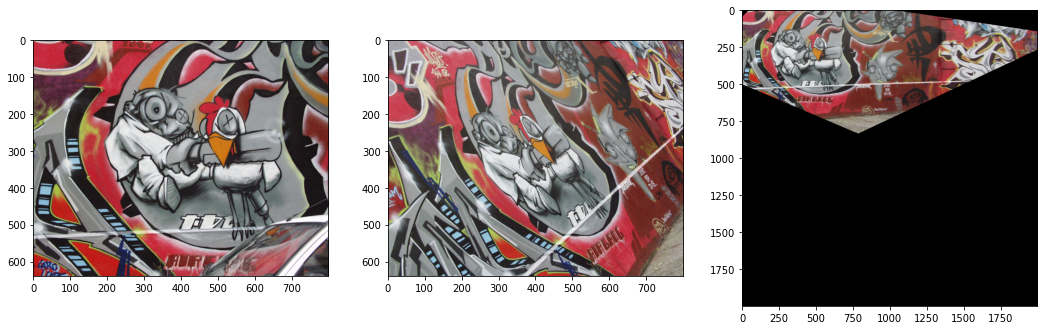

In [9]:
# Warping using the given homogapghy

im1 = cv.imread(r'./graf/img1.ppm', cv.IMREAD_ANYCOLOR)
im4 = cv.imread(r'./graf/img4.ppm', cv.IMREAD_ANYCOLOR)

H = []
with open(r'./graf/H1to4p') as f:
    H = np.array([[float(h) for h in line.split()] for line in f])

im1to4 = cv.warpPerspective(im4, np.linalg.inv(H), (2000,2000))

fig,ax = plt.subplots(1,3, figsize = (18, 18))
ax[0].imshow(cv.cvtColor(im1, cv.COLOR_BGR2RGB))
ax[1].imshow(cv.cvtColor(im4, cv.COLOR_BGR2RGB))
ax[2].imshow(cv.cvtColor(im1to4, cv.COLOR_BGR2RGB))